# Edge detection

## 2.2 Laplacian of Gaussian

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

#### 1. Apply a 5 x 5 Laplacian of Gaussian edge detector to the image 'woman'.

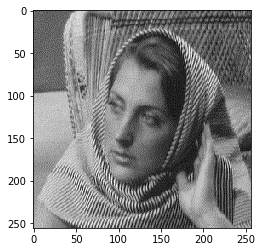

In [2]:
woman = cv2.imread('woman.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(woman, cmap='gray')

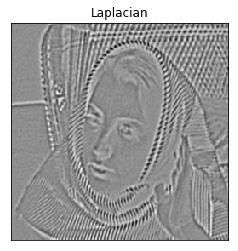

In [3]:
filter_size = 5
women_gaussian = cv2.GaussianBlur(woman, (filter_size, filter_size), 0)
woman_lap = cv2.Laplacian(women_gaussian, cv2.CV_32F, ksize=5)

# plot
plt.title("Laplacian"), plt.xticks([]), plt.yticks([])
plt.imshow(woman_lap, cmap = "gray")

In [106]:
# compute gradients of the laplacian 
grad = np.abs(np.diff(woman_lap))
grad = np.pad(grad, ((0, 0), (0, 1)), 'reflect') # to keep (256, 256) shape

# check where the sign of the laplacian changes.
cross = np.diff(np.sign(woman_lap))
cross = np.pad(cross, ((0, 0), (0, 1)), 'constant', constant_values=0) # to keep (256, 256) shape

# only keep the gradients that crosses zero 
grad[cross == 0] = 0

In [107]:
edge_lap = np.zeros(woman_lap.shape)

# Detect the edges by finding the gradients greater than threshold
thresh = np.absolute(woman_lap).mean() * 0.9
edge_lap[grad > thresh] = 255 

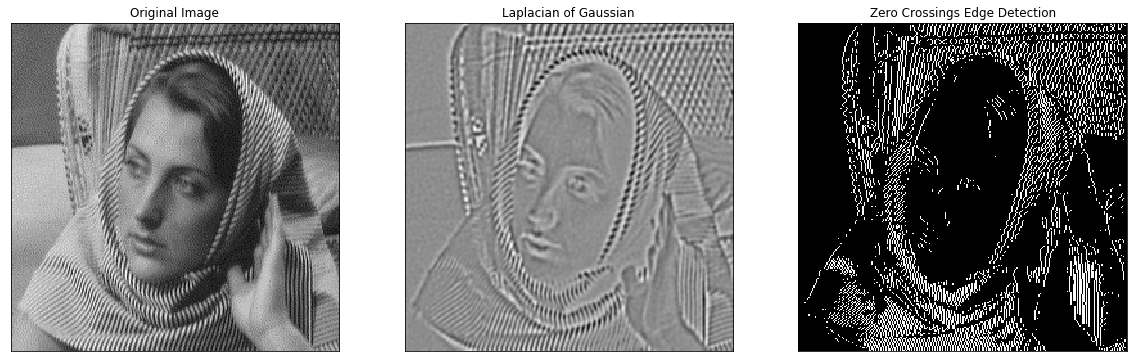

In [110]:
plt.figure(figsize=(20, 20))

plt.subplot(131), plt.imshow(woman, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(woman_lap, cmap='gray')
plt.title("Laplacian of Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(edge_lap, cmap='gray')
plt.title("Zero Crossings Edge Detection"), plt.xticks([]), plt.yticks([])
plt.show()